In [ ]:
!pip install torch numpy datasets transformers scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -U transformers


In [ ]:
pip install --upgrade transformers


In [ ]:
import transformers
print(transformers.__version__)


4.51.3


In [1]:
!pip install torch numpy datasets transformers scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [1]:
#Model 3
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedShuffleSplit

#Data loading
df = pd.read_csv("toxigen.csv")
df = df[df['prompt_label'] == 1].reset_index(drop=True)
df = df[["generation", "group"]].dropna()
df = df[df["group"] != "other"]  # можно исключить 'other' если мало примеров

labels = sorted(df["group"].unique())
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for label, i in label2id.items()}
df["label"] = df["group"].map(label2id)

#Stratified Split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(df["generation"], df["label"]))
train_df = df.iloc[train_idx].reset_index(drop=True)
test_df = df.iloc[test_idx].reset_index(drop=True)

#Model load and tokenization
model_name = "microsoft/deberta-v3-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize(example):
    return tokenizer(example["generation"], truncation=True, padding="max_length", max_length=128)

train_dataset = Dataset.from_pandas(train_df).map(tokenize)
test_dataset = Dataset.from_pandas(test_df).map(tokenize)

train_dataset = train_dataset.remove_columns(["generation", "group"])
test_dataset = test_dataset.remove_columns(["generation", "group"])

#Weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_df["label"]), y=train_df["label"])
class_weights = torch.tensor(class_weights, dtype=torch.float32)

#Focal Loss
class FocalLoss(torch.nn.Module):
    def __init__(self, alpha=None, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        ce_loss = torch.nn.functional.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss
        return focal_loss.mean()

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))

#Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="macro")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

#Custom trainer
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):  # ← добавили **kwargs
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = FocalLoss(alpha=class_weights.to(model.device))
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss


#Training
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    eval_strategy="epoch",  # вместо evaluation_strategy
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=100,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    fp16=torch.cuda.is_available(),
    report_to=[]  # отключаем логгеры (wandb и т.п.)
)


trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

trainer.train()

#Evaluation
print("Evaluation metrics:")
metrics = trainer.evaluate()
print(metrics)

#Classification Report
preds = trainer.predict(test_dataset)
y_true = preds.label_ids
y_pred = np.argmax(preds.predictions, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=[id2label[i] for i in range(len(id2label))], digits=4))

#F1-score
report = classification_report(y_true, y_pred, target_names=[id2label[i] for i in range(len(id2label))], output_dict=True)
f1_scores = [report[label]["f1-score"] for label in report if label in id2label.values()]

plt.figure(figsize=(12, 6))
bars = plt.bar(id2label.values(), f1_scores, color="skyblue")
plt.ylim(0, 1)
plt.ylabel("F1-score")
plt.title("F1-score by Class (ToxiGen Classification)")
plt.xticks(rotation=45, ha="right")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [ ]:
!pip install torch numpy datasets transformers scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Map:   0%|          | 0/50191 [00:00<?, ? examples/s]

Map:   0%|          | 0/200760 [00:00<?, ? examples/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-3-a47990b2c330>:71: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


Step,Training Loss
1000,1.530800
2000,1.248400
3000,1.203100
4000,1.180300
5000,1.136100
6000,1.133200
7000,1.113600
8000,1.100800
9000,1.021700
10000,0.957900


Map:   0%|          | 0/200760 [00:00<?, ? examples/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-3-a47990b2c330>:71: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


Step,Training Loss
1000,1.517000
2000,1.253700
3000,1.199400
4000,1.170700
5000,1.152600
6000,1.127800
7000,1.094900
8000,1.102800
9000,1.001600
10000,0.960000


Map:   0%|          | 0/200760 [00:00<?, ? examples/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-3-a47990b2c330>:71: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


Step,Training Loss
1000,1.537600
2000,1.268900
3000,1.206100
4000,1.181000
5000,1.144300
6000,1.141700
7000,1.115200
8000,1.092200
9000,1.017500
10000,0.949900


Step,Training Loss
1000,1.537600
2000,1.268900
3000,1.206100
4000,1.181000
5000,1.144300
6000,1.141700
7000,1.115200
8000,1.092200
9000,1.017500
10000,0.949900



📊 Ensemble Classification Report:
                 precision    recall  f1-score   support

          asian     0.7774    0.7840    0.7807      3977
          black     0.7755    0.7497    0.7624      3976
        chinese     0.7185    0.7340    0.7262      3812
         jewish     0.8461    0.8058    0.8254      3908
         latino     0.6944    0.6347    0.6632      3709
          lgbtq     0.8274    0.8775    0.8517      4189
     mental_dis     0.8794    0.8652    0.8722      3732
        mexican     0.7187    0.7467    0.7324      4071
    middle_east     0.7436    0.7066    0.7246      4059
         muslim     0.7472    0.7847    0.7655      3971
native_american     0.8519    0.7916    0.8206      3872
   physical_dis     0.8306    0.8194    0.8249      3100
          women     0.7694    0.8676    0.8156      3815

       accuracy                         0.7819     50191
      macro avg     0.7831    0.7821    0.7820     50191
   weighted avg     0.7823    0.7819    0.7815     

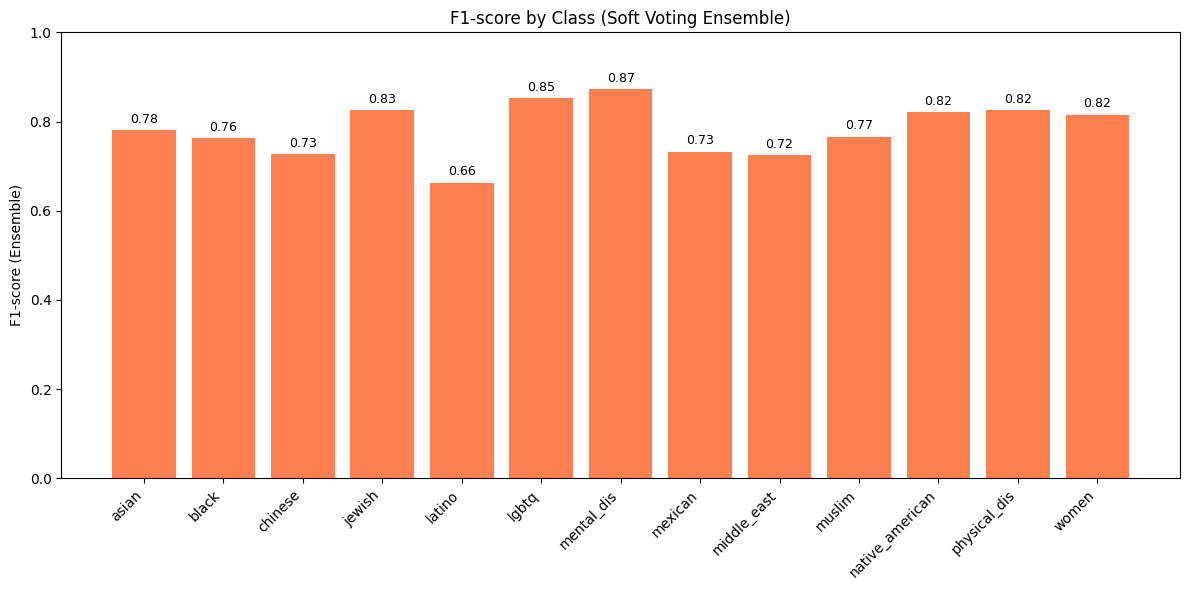

In [ ]:
import torch
import numpy as np
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments
from transformers import Trainer

# ✅ Настройки
model_name = "microsoft/deberta-v3-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# ✅ Загрузка и подготовка данных
df = pd.read_csv("toxigen.csv")
df = df.rename(columns={"group": "label"})
labels = sorted(df.label.unique())
label2id = {label: idx for idx, label in enumerate(labels)}
id2label = {idx: label for label, idx in label2id.items()}
df["label"] = df["label"].map(label2id)

def tokenize(batch):
    return tokenizer(batch["generation"], truncation=True, padding="max_length", max_length=96)  # сокращено для скорости

# ✅ Тестовый датасет
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(df["generation"], df["label"]))
test_df = df.iloc[test_idx].reset_index(drop=True)
test_dataset = Dataset.from_pandas(test_df)
test_dataset = test_dataset.map(tokenize)
test_dataset = test_dataset.remove_columns(["generation"])
y_true = test_df["label"].values

# ✅ Аргументы тренировки
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=24,  # увеличено для ускорения
    per_device_eval_batch_size=64,
    num_train_epochs=2.5,  # уменьшено
    logging_dir="./logs",
    save_strategy="no",
    eval_strategy="no",
    logging_steps=1000,
    report_to="none",
    fp16=torch.cuda.is_available(),
    gradient_accumulation_steps=1  # можно увеличить до 2, если памяти не хватает
)

# ✅ Кастомный Trainer с CrossEntropy
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = torch.nn.CrossEntropyLoss()
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

# ✅ Функция тренировки одной модели
def train_model(seed):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)
    train_idx, _ = next(split.split(df["generation"], df["label"]))
    train_df = df.iloc[train_idx].reset_index(drop=True)

    train_dataset = Dataset.from_pandas(train_df)
    train_dataset = train_dataset.map(tokenize)
    train_dataset = train_dataset.remove_columns(["generation"])

    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))
    trainer = CustomTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        tokenizer=tokenizer,
    )
    trainer.train()
    preds = trainer.predict(test_dataset).predictions
    return preds

# ✅ Тренировка трёх моделей
preds1 = train_model(seed=101)
preds2 = train_model(seed=202)
preds3 = train_model(seed=303)

# ✅ Ансамблирование soft voting
ensemble_logits = (preds1 + preds2 + preds3) / 3
ensemble_preds = np.argmax(ensemble_logits, axis=1)

# ✅ Метрики
print("\n📊 Ensemble Classification Report:")
print(classification_report(
    y_true,
    ensemble_preds,
    target_names=[id2label[i] for i in range(len(id2label))],
    digits=4
))

# ✅ F1-график
report = classification_report(
    y_true,
    ensemble_preds,
    target_names=[id2label[i] for i in range(len(id2label))],
    output_dict=True
)
f1_scores = [report[label]["f1-score"] for label in id2label.values()]

plt.figure(figsize=(12, 6))
bars = plt.bar(id2label.values(), f1_scores, color="coral")
plt.ylim(0, 1)
plt.ylabel("F1-score (Ensemble)")
plt.title("F1-score by Class (Soft Voting Ensemble)")
plt.xticks(rotation=45, ha="right")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()


In [1]:
!pip install torch numpy datasets transformers scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/147582 [00:00<?, ? examples/s]

Map:   0%|          | 0/36896 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-2-1ebad7b4ad82>:129: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


Step,Training Loss
1000,2.074600
2000,1.681400
3000,1.560000
4000,1.466100
5000,1.368400
6000,1.302400
7000,0.910200
8000,0.814200
9000,0.769400
10000,0.771700


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map:   0%|          | 0/147582 [00:00<?, ? examples/s]

Map:   0%|          | 0/36896 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
1000,1.634200
2000,1.237300
3000,1.150000
4000,1.100700
5000,1.030600
6000,0.988300
7000,0.805800
8000,0.755900
9000,0.719100
10000,0.710500


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Map:   0%|          | 0/147582 [00:00<?, ? examples/s]

Map:   0%|          | 0/36896 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/286M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/286M [00:00<?, ?B/s]

Step,Training Loss
1000,2.397700
2000,1.831700
3000,1.684800
4000,1.590100
5000,1.514800
6000,1.453900
7000,1.174500
8000,1.108500
9000,1.065300
10000,1.047100



📊 Ensemble Classification Report:
                 precision    recall  f1-score   support

          asian     0.8850    0.9186    0.9015      4056
          black     0.8109    0.8857    0.8467      3918
        chinese     0.7668    0.6411    0.6983      1939
         jewish     0.9099    0.7492    0.8218      1914
         latino     0.8290    0.8553    0.8419      3855
          lgbtq     0.8265    0.7430    0.7825      2000
     mental_dis     0.8154    0.8188    0.8171      1893
        mexican     0.7426    0.6683    0.7035      1981
    middle_east     0.7934    0.9077    0.8467      4104
         muslim     0.8644    0.8972    0.8805      3959
native_american     0.8788    0.6387    0.7397      1976
   physical_dis     0.8097    0.6924    0.7465      1671
          women     0.8364    0.9405    0.8854      3630

       accuracy                         0.8304     36896
      macro avg     0.8284    0.7966    0.8086     36896
   weighted avg     0.8311    0.8304    0.8276     

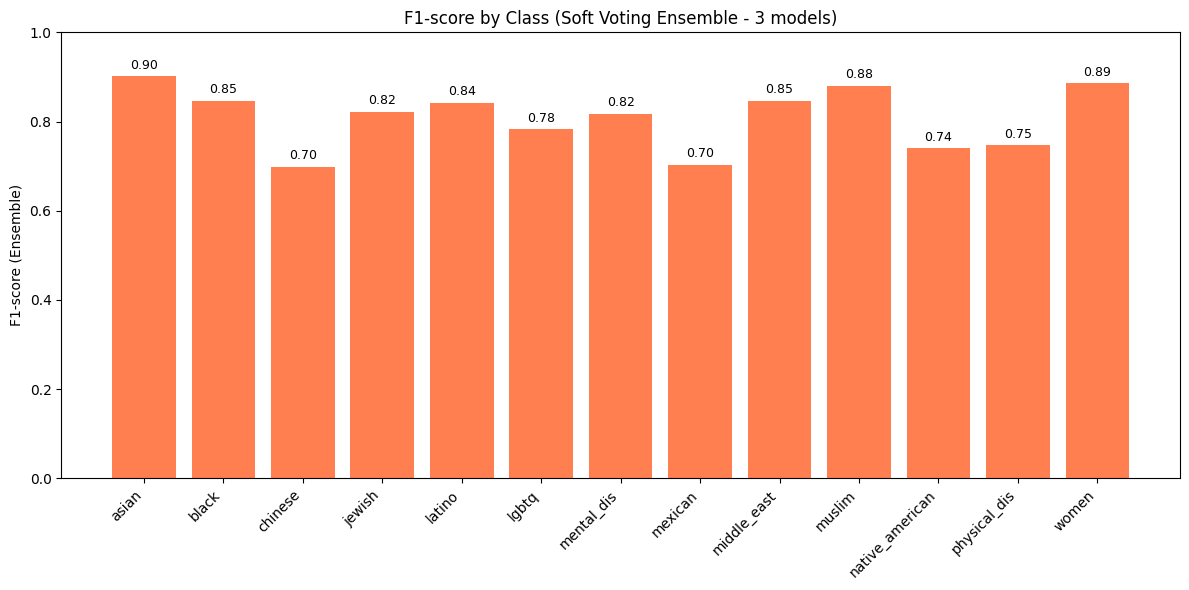

In [2]:
#Model 6
import torch
import numpy as np
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
)

#Loading models
model_names = [
    "bert-base-uncased",
    "roberta-base",
    "microsoft/deberta-v3-small"
]

# Data reading
df = pd.read_csv("toxigen.csv")
df = df[df["prompt_label"] == 1].reset_index(drop=True)

df = df.rename(columns={"group": "label"})
labels = sorted(df.label.unique())
label2id = {label: idx for idx, label in enumerate(labels)}
id2label = {idx: label for label, idx in label2id.items()}
df["label"] = df["label"].map(label2id)

# Oversampling
weak_classes = ["women", "asian", "black", "middle_east", "muslim", "latino"]
weak_ids = [label2id[label] for label in weak_classes if label in label2id]
df_oversampled = df.copy()

for label_id in weak_ids:
    class_df = df[df["label"] == label_id]
    df_oversampled = pd.concat([df_oversampled, class_df.sample(n=len(class_df), replace=True)], axis=0)

df_oversampled = df_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)

#Data split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(df_oversampled["generation"], df_oversampled["label"]))
train_df = df_oversampled.iloc[train_idx].reset_index(drop=True)
test_df = df_oversampled.iloc[test_idx].reset_index(drop=True)

#Data tokenization
def tokenize(batch, tokenizer):
    return tokenizer(batch["generation"], truncation=True, padding="max_length", max_length=96)

y_true = test_df["label"].values

#Custom weights for our weak classes
base_weight = 1.0
boosted_weight = 3.0
custom_weights = []

for label in labels:
    if label in weak_classes:
        custom_weights.append(boosted_weight)
    else:
        custom_weights.append(base_weight)

class_weights = torch.tensor(custom_weights).float()

#Focal Loss
class FocalLoss(torch.nn.Module):
    def __init__(self, alpha=None, gamma=2, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, logits, labels):
        ce_loss = torch.nn.functional.cross_entropy(logits, labels, reduction="none")
        pt = torch.exp(-ce_loss)
        at = self.alpha[labels] if self.alpha is not None else 1.0
        focal_loss = at * (1 - pt) ** self.gamma * ce_loss
        return torch.mean(focal_loss) if self.reduction == 'mean' else focal_loss

#Custom Trainer
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        if logits.ndim != 2:
            logits = logits.view(-1, model.config.num_labels)
        if labels.ndim != 1:
            labels = labels.view(-1)

        loss_fn = FocalLoss(alpha=class_weights.to(logits.device), gamma=2)
        loss = loss_fn(logits, labels)
        return (loss, outputs) if return_outputs else loss

#Arguments for training
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=24,
    per_device_eval_batch_size=64,
    num_train_epochs=2.5,
    logging_dir="./logs",
    save_strategy="no",
    eval_strategy="no",
    logging_steps=1000,
    report_to="none",
    fp16=torch.cuda.is_available(),
)

#Trainer func
def train_and_predict(model_name, seed):
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    train_dataset = Dataset.from_pandas(train_df)
    test_dataset = Dataset.from_pandas(test_df)
    train_dataset = train_dataset.map(lambda x: tokenize(x, tokenizer))
    test_dataset = test_dataset.map(lambda x: tokenize(x, tokenizer))
    train_dataset = train_dataset.remove_columns(["generation"])
    test_dataset = test_dataset.remove_columns(["generation"])

    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))

    trainer = CustomTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        tokenizer=tokenizer,
    )

    trainer.train()
    preds = trainer.predict(test_dataset).predictions
    return preds

preds_all = []
for seed, model_name in zip([101, 202, 303], model_names):
    preds = train_and_predict(model_name, seed)
    preds_all.append(preds)

# Soft Voting
ensemble_logits = sum(preds_all) / len(preds_all)
ensemble_preds = np.argmax(ensemble_logits, axis=1)

#Metrics
print("\n Ensemble Classification Report:")
print(classification_report(
    y_true,
    ensemble_preds,
    target_names=[id2label[i] for i in range(len(id2label))],
    digits=4
))

#F1-class.report
report = classification_report(
    y_true,
    ensemble_preds,
    target_names=[id2label[i] for i in range(len(id2label))],
    output_dict=True
)
f1_scores = [report[label]["f1-score"] for label in id2label.values()]

plt.figure(figsize=(12, 6))
bars = plt.bar(id2label.values(), f1_scores, color="coral")
plt.ylim(0, 1)
plt.ylabel("F1-score (Ensemble)")
plt.title("F1-score by Class (Soft Voting Ensemble - 3 models)")
plt.xticks(rotation=45, ha="right")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()
